# EDA - Khai phá Dữ liệu

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display
from IPython.display import display
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

In [4]:
appid_info = pd.read_csv('../cleaned_data/appid_info_clean.csv')
transaction = pd.read_csv('../cleaned_data/transaction_clean.csv')
campaign_info = pd.read_csv('../cleaned_data/campaign_info_clean.csv')
map_card = pd.read_csv('../cleaned_data/map_card_clean.csv')
referral_history = pd.read_csv('../cleaned_data/referral_history_clean.csv')
transfer = pd.read_csv('../cleaned_data/transfer_clean.csv')
user_profile = pd.read_csv('../cleaned_data/user_profile_clean.csv')

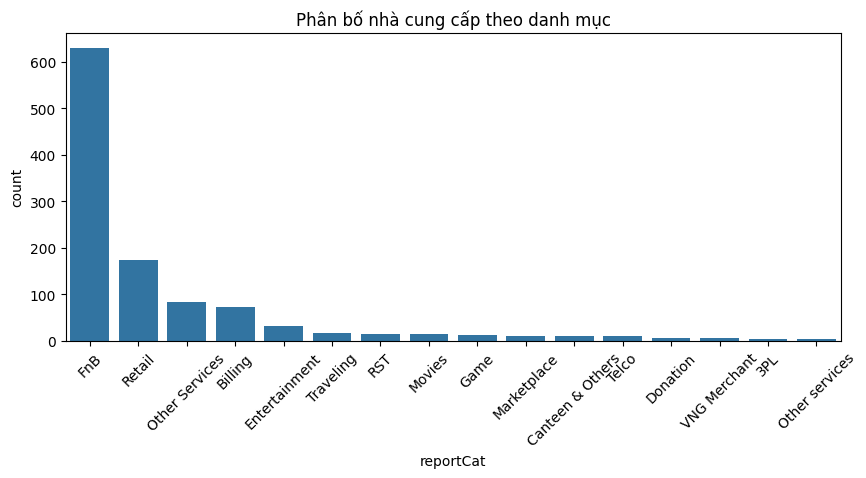

In [5]:
# Số lượng appID theo reportCat
plt.figure(figsize=(10, 4))
sns.countplot(data=appid_info, x='reportCat', order=appid_info['reportCat'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Phân bố nhà cung cấp theo danh mục")
plt.show()


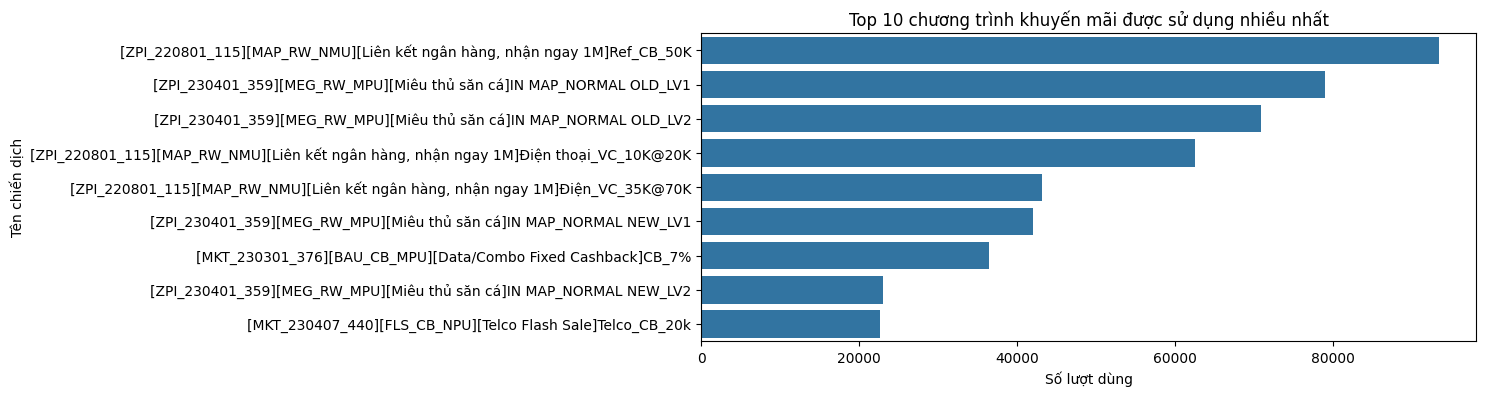

In [6]:
# Tần suất sử dụng từng campaignID
campaign_usage = transaction['campaignID'].value_counts().rename('usage_count').reset_index().rename(columns={'index': 'campaignID'})

# Lấy tên chương trình khuyến mãi
campaign_name = campaign_info.set_index('campaignID')['promotionName']
campaign_usage['promotionName'] = campaign_usage['campaignID'].map(campaign_name)

# Biểu đồ
top_campaigns = campaign_usage.head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x='usage_count', y='promotionName', data=top_campaigns)
plt.title("Top 10 chương trình khuyến mãi được sử dụng nhiều nhất")
plt.xlabel("Số lượt dùng")
plt.ylabel("Tên chiến dịch")
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển định dạng ngày
user_profile['created_date'] = pd.to_datetime(user_profile['created_date'])

# Tạo biến tuổi tài khoản (tính theo ngày)
latest_date = user_profile['created_date'].max()
user_profile['account_age_days'] = (latest_date - user_profile['created_date']).dt.days

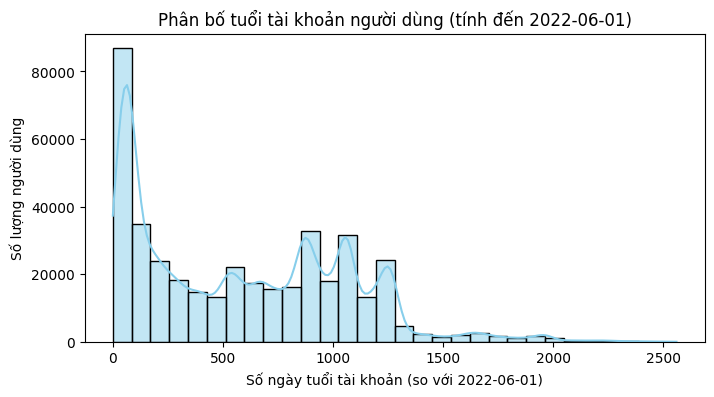

🔟 Top 10 tài khoản được tạo ngắn nhất (tính đến 2022-06-01):


,userID,created_date,account_age_days
119122,daa6f10ecf9aa965699bf3e6f5411f3c,2022-05-31,1
119121,68c3d84291db3be6df8075e55698a86a,2022-05-31,1
119120,f176cbdad6ca23116bd974f55b3ee537,2022-05-31,1
4809,5611358145e6c8d2a6d960dd5d73109a,2022-05-31,1
4808,4ee5003a18436ab2c099183229144269,2022-05-31,1
4807,4129d289370e1281604dbdfb4886498b,2022-05-31,1
4806,7ae4230cd6ff3d3b1a50136668afcb4e,2022-05-31,1
4805,210fb7562db8da803ab0763bf74bd0d4,2022-05-31,1
4804,d8455dbf434751947f5056f7cd2e9c15,2022-05-31,1
4803,cc94a07d2b1966c9d6c7b39cdba7aeca,2022-05-31,1


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Mốc tham chiếu kết thúc chiến dịch ---
ref_date = pd.Timestamp("2022-06-01 23:59:59")

# --- Tính tuổi tài khoản tại thời điểm đó ---
user_profile['created_date'] = pd.to_datetime(user_profile['created_date'], errors='coerce')
user_profile['account_age_days'] = (ref_date - user_profile['created_date']).dt.days.clip(lower=0)

# --- Biểu đồ phân bố tuổi tài khoản ---
plt.figure(figsize=(8,4))
sns.histplot(user_profile['account_age_days'], bins=30, kde=True, color='skyblue')
plt.title("Phân bố tuổi tài khoản người dùng (tính đến 2022-06-01)")
plt.xlabel("Số ngày tuổi tài khoản (so với 2022-06-01)")
plt.ylabel("Số lượng người dùng")
plt.show()

# --- Top 10 tài khoản được tạo ngắn nhất ---
top10_newest_users = (
    user_profile[['userID', 'created_date', 'account_age_days']]
    .sort_values(by='account_age_days', ascending=True)
    .head(10)
)

print("🔟 Top 10 tài khoản được tạo ngắn nhất (tính đến 2022-06-01):")
display(top10_newest_users)


In [9]:
success_rate = map_card['requestStatus'].mean()
print(f"Tỷ lệ liên kết thẻ thành công: {success_rate:.2%}")

Tỷ lệ liên kết thẻ thành công: 66.13%


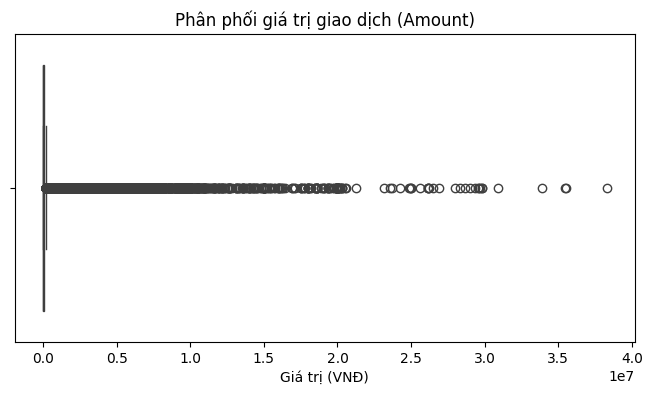

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(x=transaction['amount'])
plt.title("Phân phối giá trị giao dịch (Amount)")
plt.xlabel("Giá trị (VNĐ)")
plt.show()

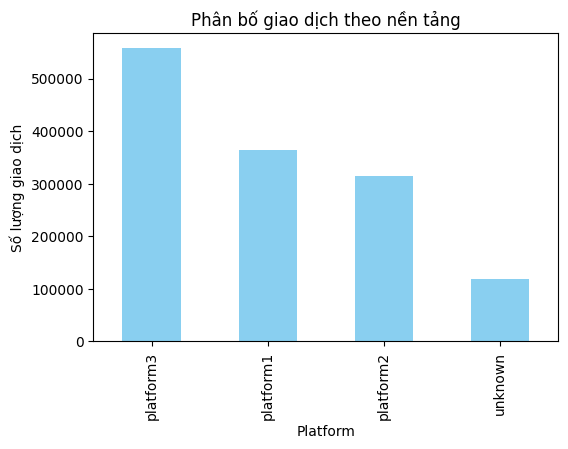

In [11]:
plt.figure(figsize=(6,4))
transaction['platform'].value_counts().plot(kind='bar', color='#89CFF0')
plt.title("Phân bố giao dịch theo nền tảng")
plt.xlabel("Platform")
plt.ylabel("Số lượng giao dịch")
plt.show()

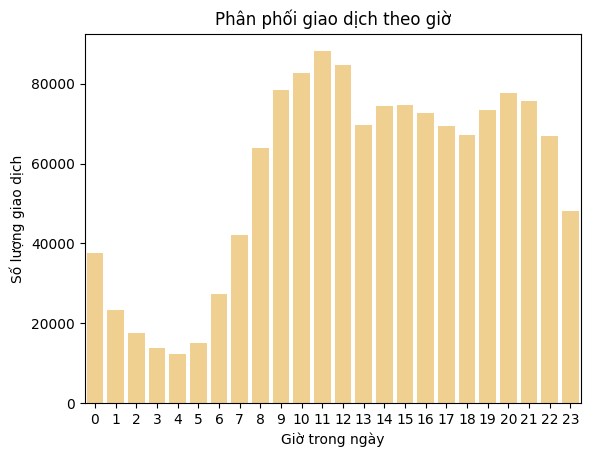

In [12]:
transaction['hour'] = pd.to_datetime(transaction['reqDate']).dt.hour
sns.countplot(x='hour', data=transaction, color='#FFD580')
plt.title("Phân phối giao dịch theo giờ")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Số lượng giao dịch")
plt.show()

In [13]:
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (10, 5)

Số lượng self-transfer: 2793 (0.14%)


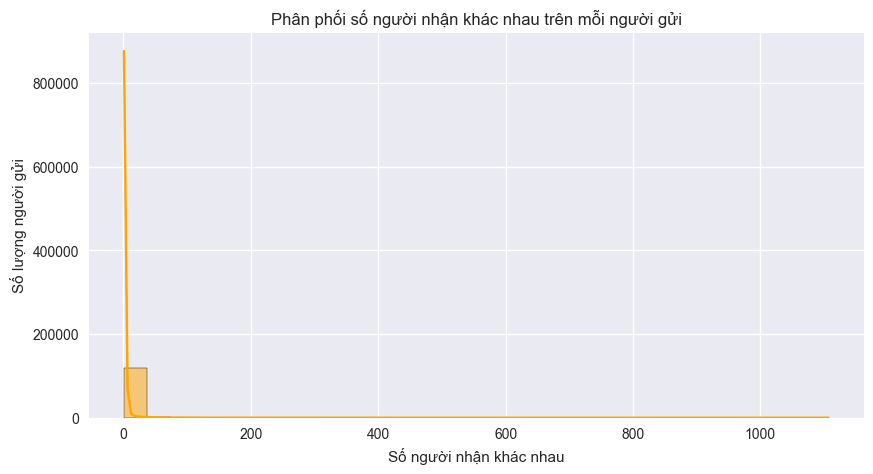


🔝 Top 10 người gửi cho nhiều người khác nhau nhất:


,sender,unique_receivers
51318,6e9720eb8a301f1b442b49c31d83070c,1107
6201,0d9b3f2a3d871da2f887383412d84df8,921
4116,08e46b1044d2df84664537a667f939b8,859
82821,b1c07223940894091f785817336c1835,759
35121,4b7e1e4fc07ae0ca2bf60702cdf879c2,727
71839,9a8cf89a2d0b04d26c282b2cbf6a0ebf,700
60467,8282c347c6593b49e45b621d46b10647,657
63207,8841ed118b191a1d9dbe8e61668a5fe4,657
91055,c37f8866f4e436113ada6e24c9f29268,653
17710,26360b3b2c3d07472cdc0f2cc29638d7,648


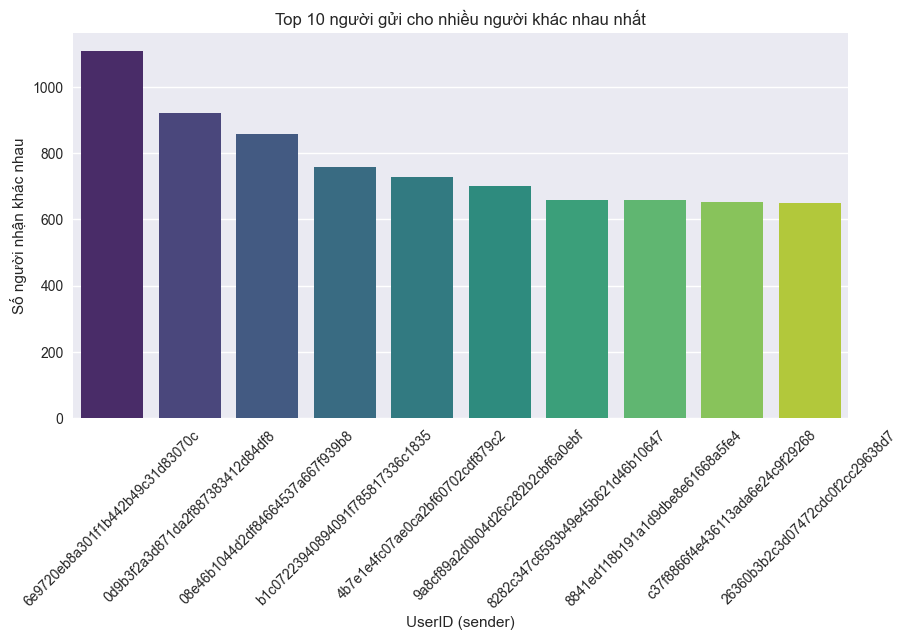

In [14]:
# ==========================================
# 🧩 PHÂN TÍCH SỐ NGƯỜI NHẬN KHÁC NHAU MỖI NGƯỜI GỬI
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # dùng để hiển thị bảng trong Jupyter

plt.style.use('seaborn-v0_8')
sns.set_palette('mako')
plt.rcParams['figure.figsize'] = (10,5)

# 🧾 Self-transfer (tự gửi cho chính mình)
self_transfer = transfer[transfer['sender'] == transfer['receiver']]
print(f"Số lượng self-transfer: {len(self_transfer)} ({len(self_transfer)/len(transfer):.2%})")

# 📊 Số lượng người nhận khác nhau trên mỗi người gửi
unique_receivers = (
    transfer.groupby('sender')['receiver']
    .nunique()
    .reset_index(name='unique_receivers')
    .sort_values('unique_receivers', ascending=False)
)

# ===== Biểu đồ trực quan =====
sns.histplot(unique_receivers['unique_receivers'], bins=30, color='orange', kde=True)
plt.title("Phân phối số người nhận khác nhau trên mỗi người gửi")
plt.xlabel("Số người nhận khác nhau")
plt.ylabel("Số lượng người gửi")
plt.show()

# ===== Top 10 người gửi cho nhiều người khác nhau nhất =====
top_unique_receivers = unique_receivers.head(10)
print("\n🔝 Top 10 người gửi cho nhiều người khác nhau nhất:")
display(top_unique_receivers)

# Biểu đồ Top 10 người gửi nhiều nhất
sns.barplot(data=top_unique_receivers, x='sender', y='unique_receivers', palette='viridis')
plt.title("Top 10 người gửi cho nhiều người khác nhau nhất")
plt.xlabel("UserID (sender)")
plt.ylabel("Số người nhận khác nhau")
plt.xticks(rotation=45)
plt.show()


🔝 Top 10 người gửi nhiều giao dịch nhất:


,sender,num_transfers
42324,5b59fab90d10b0ad4942491284eac6f5,23645
37566,50f9f2c3517964714f539260431ec536,12421
35366,4c0a61eced5e53521bee0852b279e9d7,10706
90563,c270d6467a3eb1c051964344a76c1fbd,8218
85097,b67ff68846022c4ecaef5dcbd8d6de50,5824
25060,36175ab8c5157a90a2ace2af2b8b37d1,5422
73600,9e41d7890b40ca1541099c2383580c9e,4663
19959,2af8fdc901434bba2b27963e06bd9a96,4184
36717,4f09de5041d75d738d0c2a140dac0a96,4170
114402,f57e898bf9499966a77425a2f419e4d7,4162


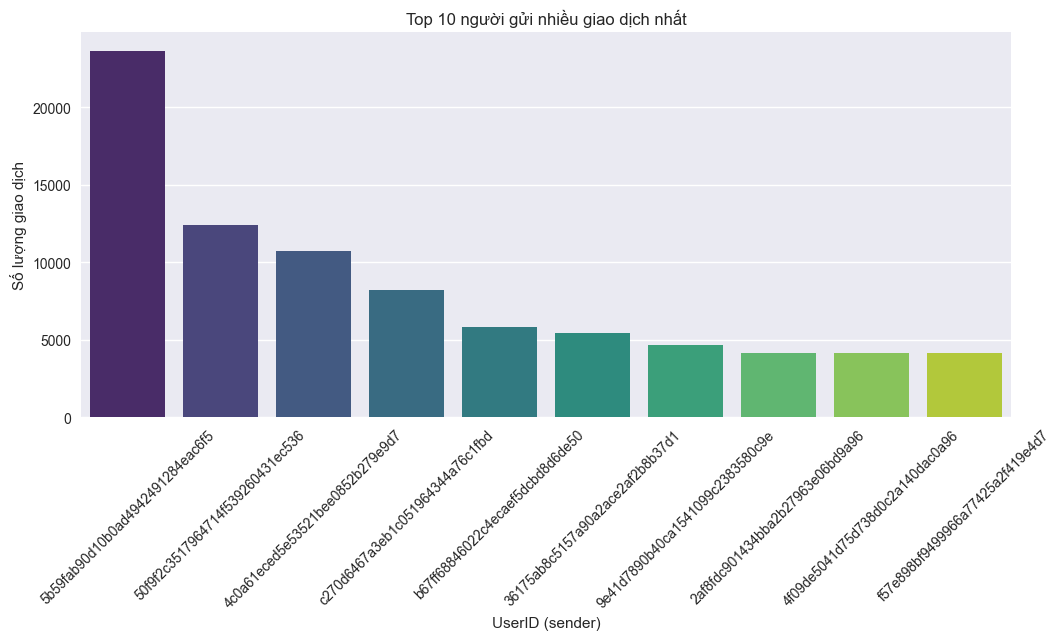


📱 Top 10 thiết bị được nhiều người dùng gửi tiền nhất:


,deviceID,unique_senders
110040,CB50F963-F882-4AAE-AC6F-0516A6E48342,5123
1491,029b90688b106ee2,41
143065,e248d245167dfdc8,30
34465,3D7AD6DB-4A7B-402E-AB8E-143B43F53854,24
137990,b91cfacdbd181cdb,23
116062,D8C0DB39-DC76-4CC1-8C4B-29F4041B8A4B,22
102791,BB28D62F-C694-4DCB-84A8-93976DF5BCAA,21
75493,8502563C-763D-412E-8B86-8802E58883D1,20
103433,BCA4D9BD-4D95-4FFA-A107-0E91EDC1747B,16
106820,C42555B1-EA7E-4187-99F3-2ACFE149281A,15


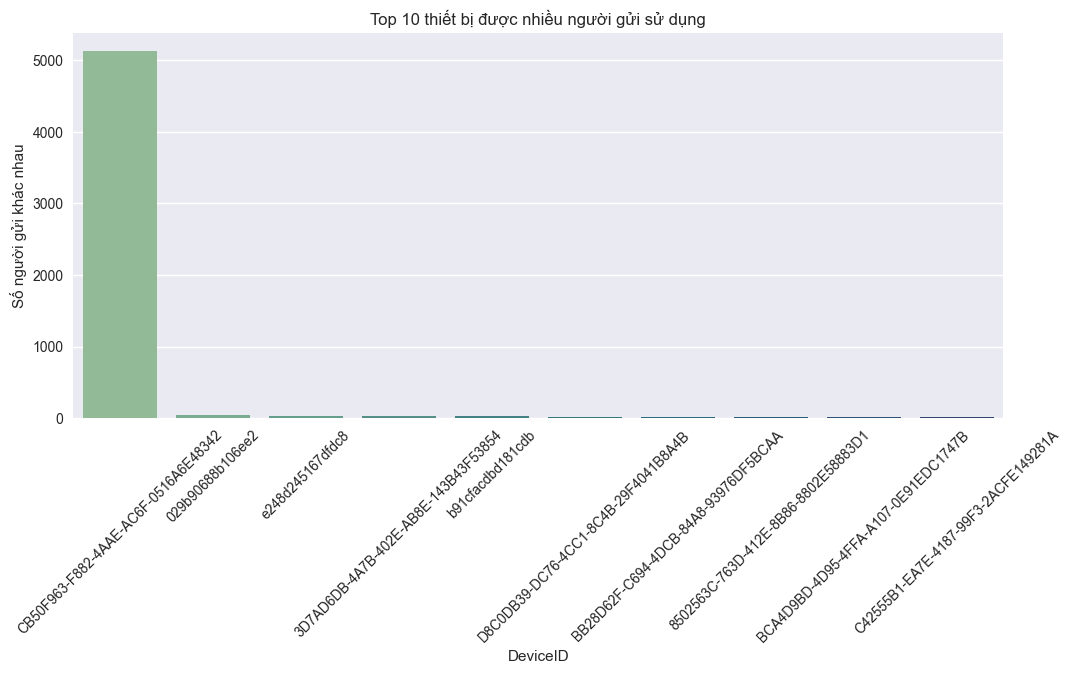

In [15]:
# ==========================================
# 🧩 TRANSFER ANALYSIS – Hành vi chuyển tiền bất thường
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # ✅ Cần dòng này để dùng display()

plt.style.use('seaborn-v0_8')
sns.set_palette('mako')
plt.rcParams['figure.figsize'] = (12,5)

# 📊 1️⃣ Tính số lượng giao dịch gửi của mỗi user
transfer_freq = (
    transfer.groupby('sender')['transID']
    .count()
    .reset_index(name='num_transfers')
    .sort_values('num_transfers', ascending=False)
)

# 🔁 2️⃣ Thiết bị được nhiều người dùng gửi từ đó
device_reuse = (
    transfer.groupby('deviceID')['sender']
    .nunique()
    .reset_index(name='unique_senders')
    .sort_values('unique_senders', ascending=False)
)

# ===== TOP 10 NGƯỜI GỬI NHIỀU GIAO DỊCH NHẤT =====
top_senders = transfer_freq.head(10)
print("\n🔝 Top 10 người gửi nhiều giao dịch nhất:")
display(top_senders)

sns.barplot(data=top_senders, x='sender', y='num_transfers', palette='viridis')
plt.title("Top 10 người gửi nhiều giao dịch nhất")
plt.xlabel("UserID (sender)")
plt.ylabel("Số lượng giao dịch")
plt.xticks(rotation=45)
plt.show()

# ===== TOP 10 THIẾT BỊ BỊ REUSE NHIỀU NHẤT =====
top_devices = device_reuse.head(10)
print("\n📱 Top 10 thiết bị được nhiều người dùng gửi tiền nhất:")
display(top_devices)

sns.barplot(data=top_devices, x='deviceID', y='unique_senders', palette='crest')
plt.title("Top 10 thiết bị được nhiều người gửi sử dụng")
plt.xlabel("DeviceID")
plt.ylabel("Số người gửi khác nhau")
plt.xticks(rotation=45)
plt.show()


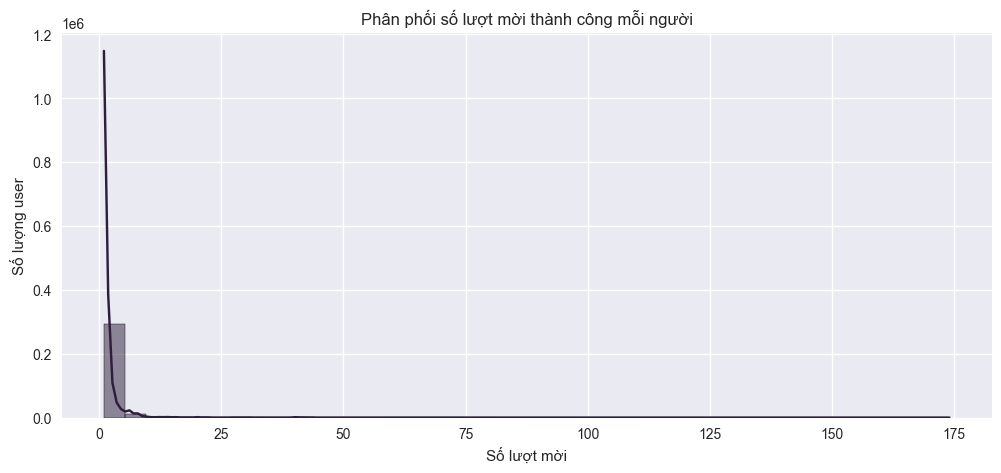

In [16]:
# 🧮 Tổng số referral mỗi user
referral_count = referral_history.groupby('userID')['refereeId'].count().reset_index(name='referrals_per_user')

# 🔁 Referral theo timestamp để tìm batch đăng ký
referral_batch = referral_history.groupby(['userID', 'reqDate']).size().reset_index(name='referrals_in_batch')

# ===== Biểu đồ trực quan =====
sns.histplot(referral_count['referrals_per_user'], bins=40, kde=True)
plt.title("Phân phối số lượt mời thành công mỗi người")
plt.xlabel("Số lượt mời")
plt.ylabel("Số lượng user")
plt.show()



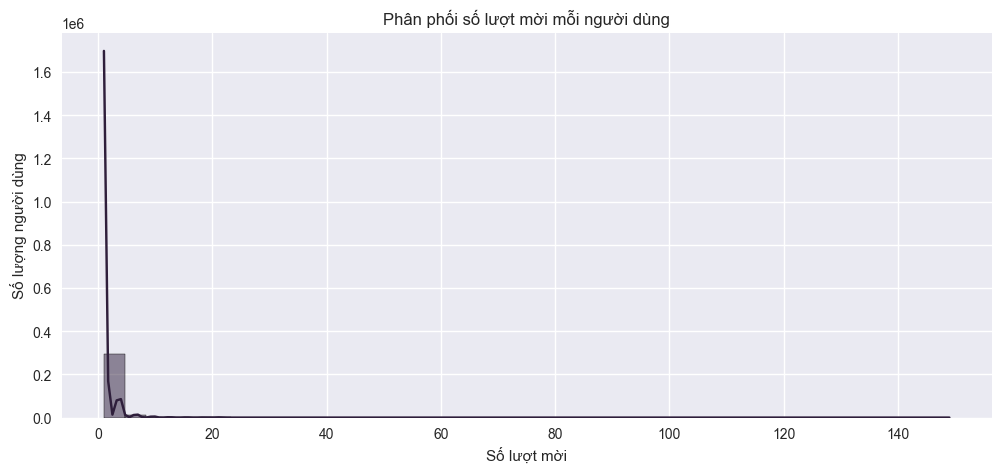

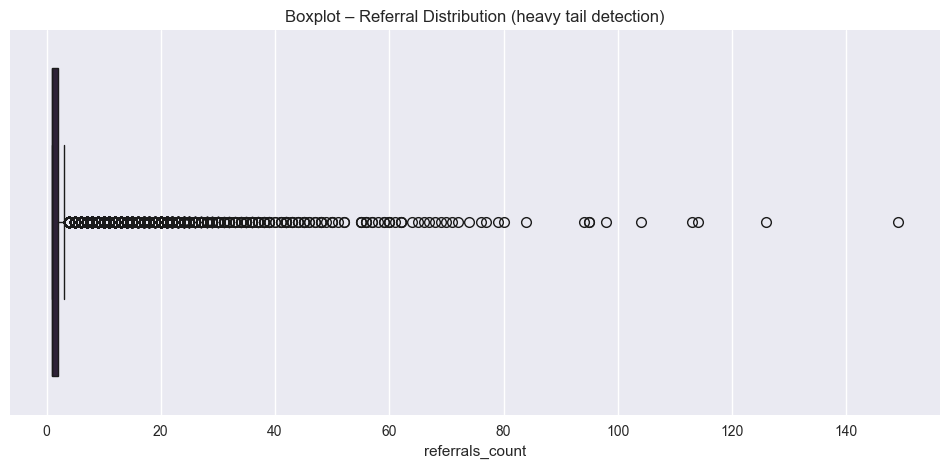

In [17]:
# ======== REFERRAL ANALYSIS ========

# 🧮 Số lượt mời mỗi người dùng
referral_per_user = (
    referral_history.groupby('userID')['refereeId']
    .nunique()
    .reset_index(name='referrals_count')
)

# ⏱ Số lượt mời cùng thời điểm (batch đăng ký)
batch_referrals = (
    referral_history.groupby(['userID', 'reqDate'])
    .size()
    .reset_index(name='referrals_in_batch')
)

# ===== Visualization =====
sns.histplot(referral_per_user['referrals_count'], bins=40, kde=True)
plt.title("Phân phối số lượt mời mỗi người dùng")
plt.xlabel("Số lượt mời")
plt.ylabel("Số lượng người dùng")
plt.show()

sns.boxplot(x=referral_per_user['referrals_count'])
plt.title("Boxplot – Referral Distribution (heavy tail detection)")
plt.show()


Tỷ lệ liên kết thất bại: 33.87%


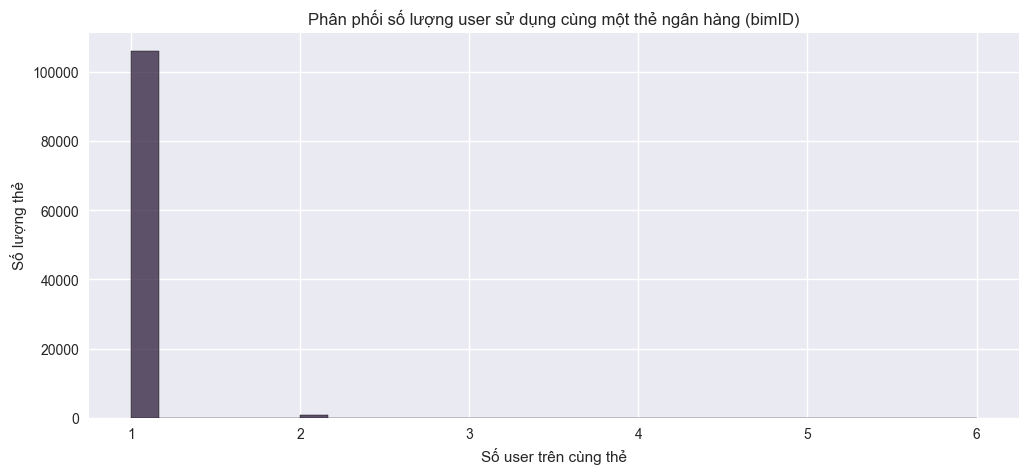

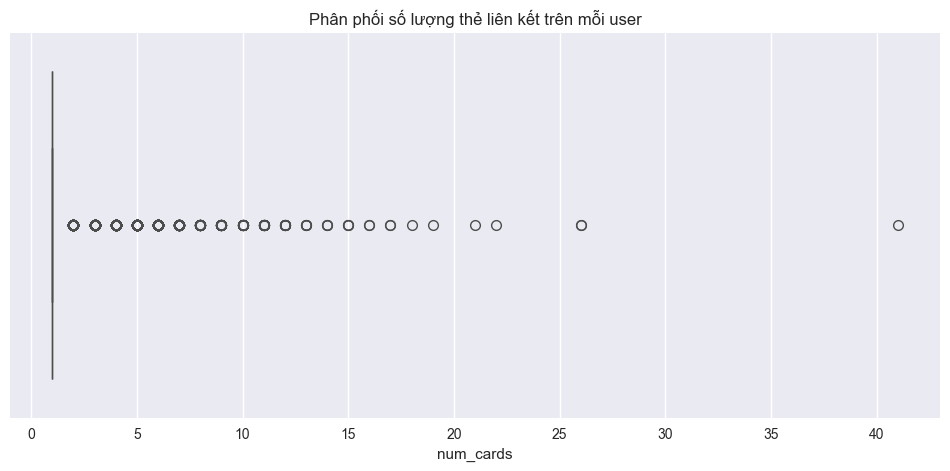

In [18]:
# ======== MAP_CARD ANALYSIS ========

# 🧾 Số lượng thẻ mỗi user
cards_per_user = map_card.groupby('userID')['bimID'].nunique().reset_index(name='num_cards')

# 🧾 Số lượng user mỗi thẻ
users_per_card = map_card.groupby('bimID')['userID'].nunique().reset_index(name='num_users')

# 🚫 Tỷ lệ liên kết thất bại
failure_rate = (map_card['requestStatus'] != 1).mean()
print(f"Tỷ lệ liên kết thất bại: {failure_rate:.2%}")

# ===== Visualization =====
sns.histplot(users_per_card['num_users'], bins=30, kde=False)
plt.title("Phân phối số lượng user sử dụng cùng một thẻ ngân hàng (bimID)")
plt.xlabel("Số user trên cùng thẻ")
plt.ylabel("Số lượng thẻ")
plt.show()

sns.boxplot(data=cards_per_user, x='num_cards', color='orange')
plt.title("Phân phối số lượng thẻ liên kết trên mỗi user")
plt.show()


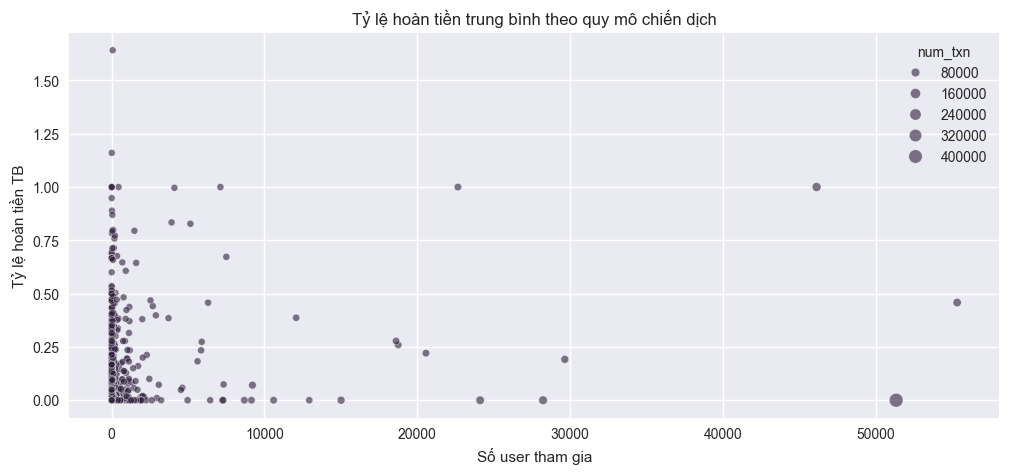

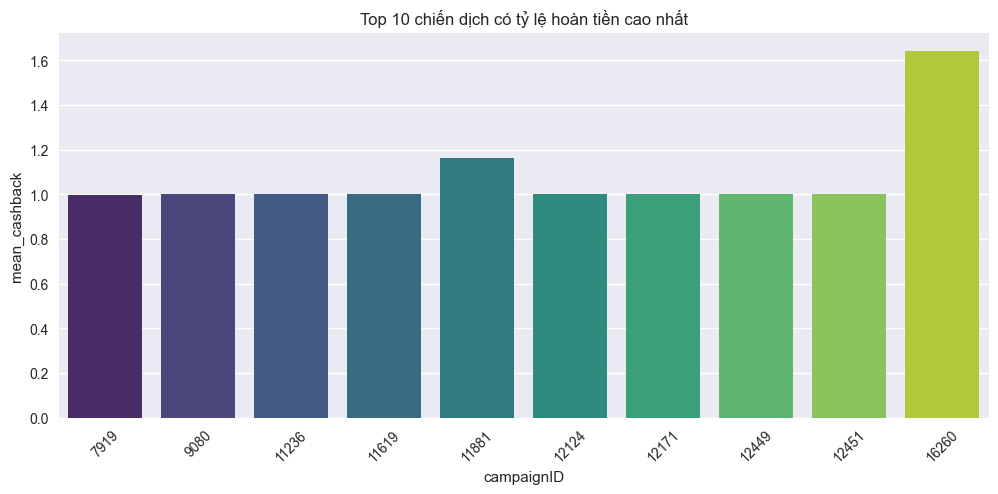

In [19]:
# ======== TRANSACTION + CAMPAIGN ANALYSIS ========

# 💰 Tính tỷ lệ hoàn tiền
transaction['cashback_ratio'] = (
    transaction['discountAmount'] / transaction['amount']
).replace([np.inf, -np.inf], np.nan).fillna(0)

# 🧮 Thống kê theo campaignID
campaign_summary = (
    transaction.groupby('campaignID')
    .agg(
        num_users=('userID', 'nunique'),
        num_txn=('transID', 'count'),
        mean_cashback=('cashback_ratio', 'mean')
    )
    .reset_index()
)

# 🔁 Phát hiện thiết bị reuse trong cùng chiến dịch
device_campaign = (
    transaction.groupby(['campaignID', 'deviceID'])['userID']
    .nunique()
    .reset_index(name='unique_users')
)
dup_device_campaign = device_campaign[device_campaign['unique_users'] > 1]

# ===== Visualization =====
sns.scatterplot(
    data=campaign_summary, 
    x='num_users', y='mean_cashback', size='num_txn', alpha=0.6
)
plt.title("Tỷ lệ hoàn tiền trung bình theo quy mô chiến dịch")
plt.xlabel("Số user tham gia")
plt.ylabel("Tỷ lệ hoàn tiền TB")
plt.show()

top_cashback = campaign_summary.sort_values('mean_cashback', ascending=False).head(10)
sns.barplot(data=top_cashback, x='campaignID', y='mean_cashback', palette='viridis')
plt.title("Top 10 chiến dịch có tỷ lệ hoàn tiền cao nhất")
plt.xticks(rotation=45)
plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

plt.style.use('seaborn-v0_8')
sns.set_palette('mako')
plt.rcParams['figure.figsize'] = (10, 7)

In [21]:
# Mỗi thiết bị có bao nhiêu user
device_user_count = transaction.groupby('deviceID')['userID'].nunique().reset_index(name='num_users_per_device')

# Mỗi user đăng nhập trên bao nhiêu thiết bị
user_device_count = transaction.groupby('userID')['deviceID'].nunique().reset_index(name='num_devices_per_user')

# Merge về user-level
user_device_features = user_device_count.merge(
    transaction[['userID', 'deviceID']].drop_duplicates(),
    on='userID',
    how='left'
).merge(device_user_count, on='deviceID', how='left')

# Gắn flag
user_device_features['shared_device_flag'] = (user_device_features['num_users_per_device'] > 3).astype(int)
user_device_features['multi_device_flag'] = (user_device_features['num_devices_per_user'] > 2).astype(int)

# Top thiết bị bị nhiều người dùng chung
sus_devices = device_user_count.sort_values('num_users_per_device', ascending=False).head(10)
print("📱 Top thiết bị có nhiều user nhất:")
display(sus_devices)


📱 Top thiết bị có nhiều user nhất:


,deviceID,num_users_per_device
144753,unknown,35748
109444,CB50F963-F882-4AAE-AC6F-0516A6E48342,476
14067,18C87291-1043-487C-B33D-F36B1937EF94,14
91818,A022A582-165B-4920-9121-468A4D738906,14
9499,10ed3cd0ab235e9c,13
10235,1244fdccd305ba22,11
92438,A1A95C30-ADEC-4613-888E-F227168528D8,11
76664,8502563C-763D-412E-8B86-8802E58883D1,9
134580,b8d4e8b183ef3a7a,8
106500,C42555B1-EA7E-4187-99F3-2ACFE149281A,8
